импорт библиотек и определение служебных функций

In [2]:
%matplotlib inline

import numpy as np
import os, sys
import matplotlib.pyplot as plt
import urllib.request

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

def md5(fname):
    import hashlib
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def show_progress(block_num, block_size, total_size):
    print(round(block_num * block_size / total_size *100,2), end="\r")

In [15]:
def sample_bootstrap(X, y, sample_size, return_OOB_sample = False):
    sample_indices = np.random.randint(0,X.shape[0], sample_size)
    if return_OOB_sample:
        oob_indices = np.array([i for i in np.arange(0, X.shape[0], 1, dtype=int) if i not in sample_indices])
        return X[sample_indices, :], y[sample_indices], X[oob_indices, :], y[oob_indices]
    else:
        return X[sample_indices, :], y[sample_indices]

Следующие две ячейки предназначены для загрузки данных.

In [3]:
mnist_data_hash = '84badc3964f15cbf97e9d0cba7f8e6d6'
mnist_labels_hash = 'c17778ef9af07481b34bc3ca84d9b21a'

In [4]:
if not os.path.exists('mnist_data.npy'):
    print('downloading MNIST data:')
    urllib.request.urlretrieve("https://ml4es.ru/links/mnist-data", "mnist_data.npy", show_progress)
downloaded_mnist_data_hash = md5('./mnist_data.npy')
assert downloaded_mnist_data_hash == mnist_data_hash, 'Downloaded MNIST data is corrupt. Try downloading again.'
print('MNIST data is valid')

if not os.path.exists('mnist_labels.npy'):
    print('downloading MNIST labels:')
    urllib.request.urlretrieve("https://ml4es.ru/links/mnist-labels", "mnist_labels.npy", show_progress)
downloaded_mnist_labels_hash = md5('./mnist_labels.npy')
assert downloaded_mnist_labels_hash == mnist_labels_hash, 'Downloaded MNIST labels is corrupt. Try downloading again.'
print('MNIST labels are valid')

MNIST data is valid
MNIST labels are valid


чтение данных и визуальное отображение отдельного экземпляра

In [5]:
X = np.load('./mnist_data.npy')
y = np.load('./mnist_labels.npy')

In [6]:
X.shape

(70000, 784)

In [7]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [8]:
X = X/255.

In [9]:
random_index = np.random.randint(0, X.shape[0], 1)
random_digit = X[random_index]

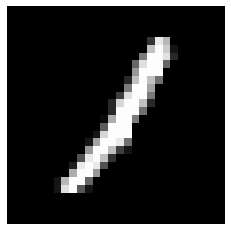

In [10]:
plt.imshow(random_digit.reshape((28,28)), cmap='gray')
_ = plt.axis('off')

In [17]:
random_subset,_ = sample_bootstrap(X, y, sample_size=200)

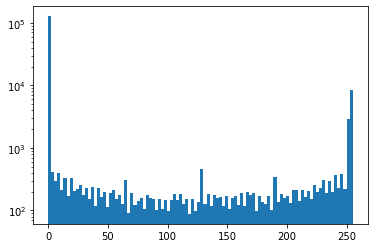

In [19]:
plt.hist((random_subset*255).ravel(), bins=100);
plt.yscale('log')

In [20]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=10000)

In [21]:
Xtrain.shape

(60000, 784)

In [22]:
ytrain.shape

(60000,)

Обучим и оценим качество логистической регрессии на одном подмножестве обучающих данных

In [24]:
sample_size = Xtrain.shape[0]
Xtr,ytr,Xoob,yoob = sample_bootstrap(Xtrain,ytrain, sample_size=sample_size, return_OOB_sample=True)
MLR = LogisticRegression()
MLR.fit(Xtr, ytr)
yoob_pred = MLR.predict(Xoob)
yoob_proba = MLR.predict_proba(Xoob)
print('accuracy: ' + str(np.mean(np.squeeze(yoob_pred)==yoob)))

accuracy: 0.9128815406976745


Оценим вероятности и метки классов для объектов тестовой выборки

In [25]:
idx = np.random.randint(0, Xtest.shape[0])
x1 = Xtest[idx,:][np.newaxis,:]
y1_proba = MLR.predict_proba(x1)

print('probability of predicted class: %f' % y1_proba[0][np.argmax(y1_proba)])

y1_pred = MLR.predict(x1)

print('true class: %d\npred class: %d' % (ytest[idx], y1_pred[0]))

probability of predicted class: 0.962118
true class: 5
pred class: 5


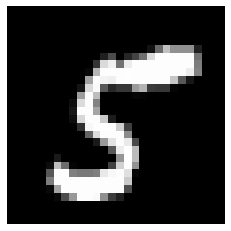

In [26]:
plt.imshow(x1.reshape((28,28)), cmap='gray')
_ = plt.axis('off')